<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Logistic Regression

Logistic Regression is a **Classification algorithm**

##Sigmoid Function

logistic_function.svg


[wiki](https://en.wikipedia.org/wiki/Sigmoid_function)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
x = np.linspace(-10,10, 100)

In [8]:
y = 1/(1+np.e**(-x))

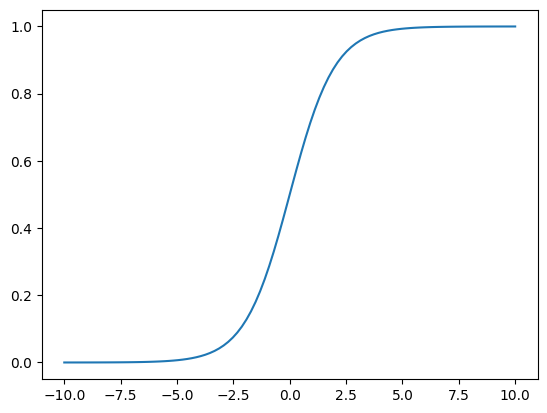

In [9]:
plt.plot(x, y)

<ipython-input-26-78220226c74f>:1: RuntimeWarning: invalid value encountered in log
  plt.plot(x, np.log(x))


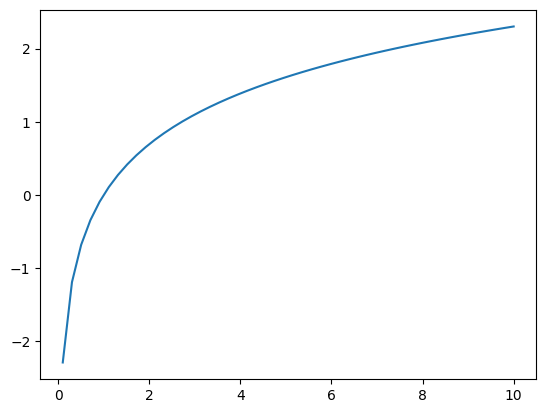

In [26]:
plt.plot(x, np.log(x))

the log of negative values is a complex value.
log of n < 1 are negative values.

Example:
**log 0.0000000000000000000000000001 = -28

##A Simple Example

In [210]:

# df = pd.DataFrame({
#     "Temp":[-10,-5,-3,-1,2,4,10,25,30],
#     "ClearSky":[0,0,0,0,0,1,1,1,1]
# })

df = pd.DataFrame({
    "Temp":[-10,-5,-3,-1,2,4,10,25,30],
    "ClearSky":[0,0,0,0,1,0,1,1,1]
})

# df

<Axes: xlabel='Temp', ylabel='ClearSky'>

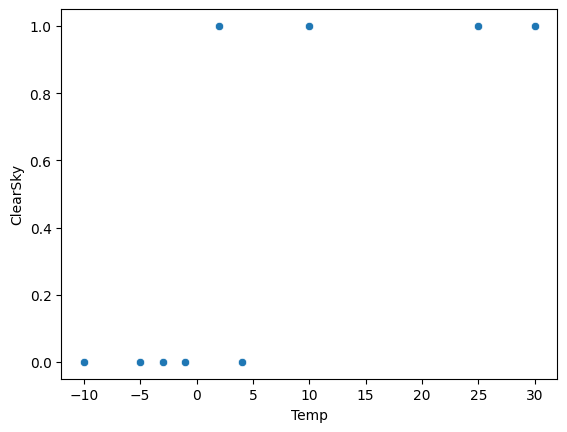

In [211]:
sns.scatterplot(df, x=df["Temp"], y=df["ClearSky"])

<Axes: xlabel='Temp', ylabel='ClearSky'>

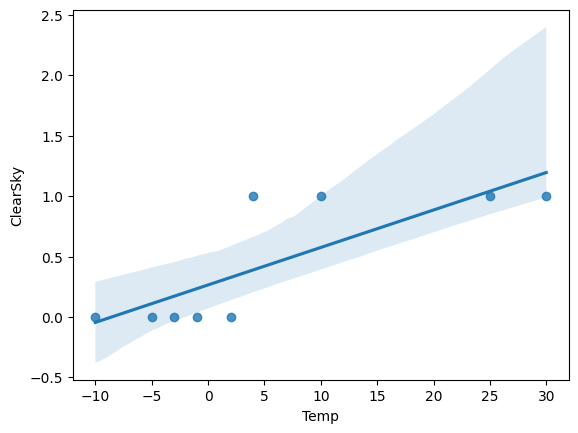

In [19]:
sns.regplot(df, x=df["Temp"], y=df["ClearSky"])

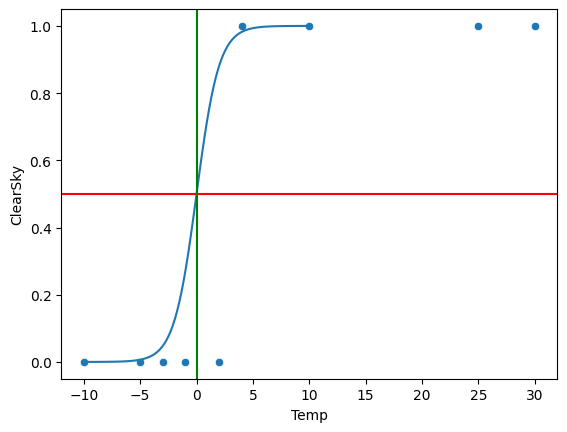

In [23]:
sns.scatterplot(df, x=df["Temp"], y=df["ClearSky"])
plt.plot(x, y)
plt.axhline(y=0.5, color='r', linestyle='-')
plt.axvline(x=0, color='g', linestyle='-')

##Logistic Regression

logistic_regression.svg

💡 Notice the Linear model as the negative exponent of e

we basically "plug" the Linear Regression Equation  **b0+b1x**  into the sigmoid function.


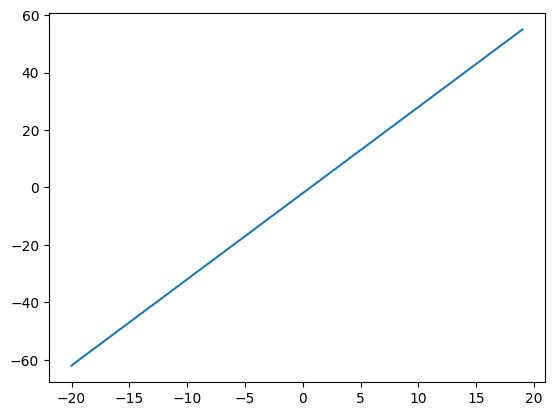

In [87]:
b0 = -2
b1 = 3

x = np.arange(-20,20)

y = b0 + b1*x

plt.plot(x, y)

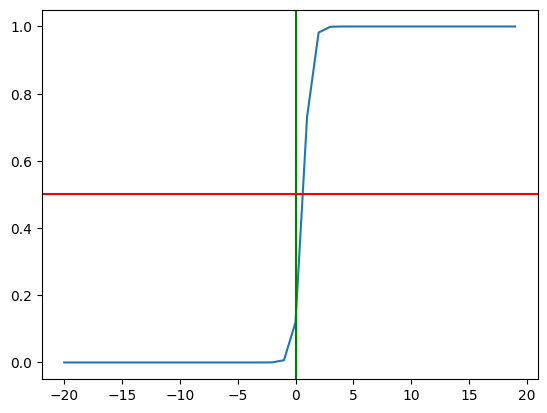

In [88]:
y_logit = 1/(1+np.e**(-y))

plt.plot(x, y_logit)
plt.axvline(x=0, color='g', linestyle='-')
plt.axhline(y=0.5, color='r', linestyle='-')

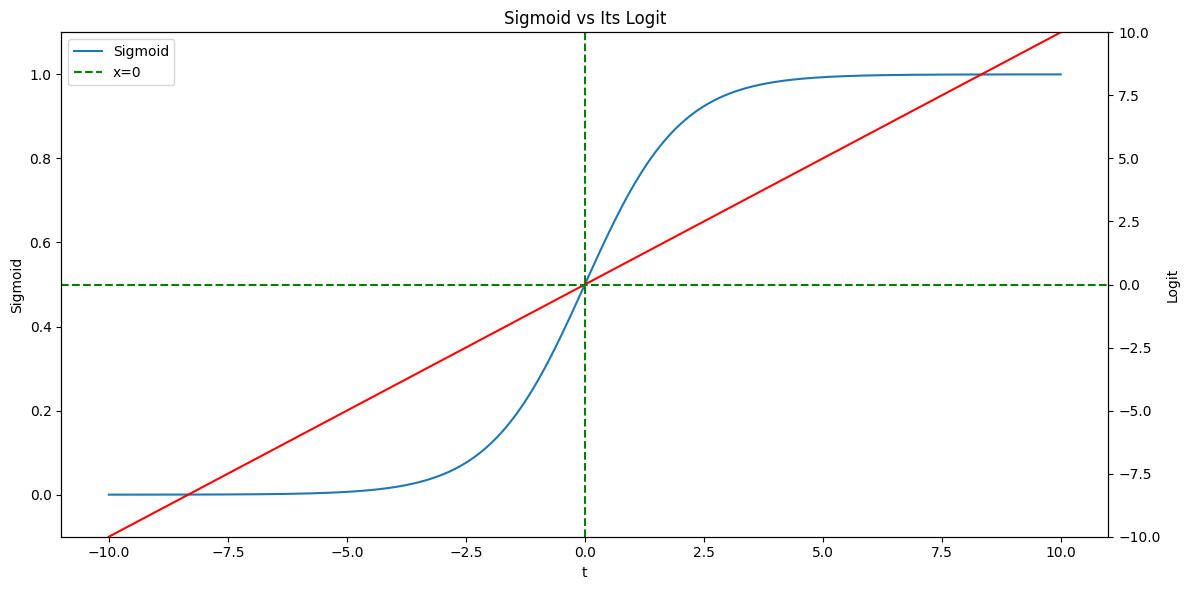

In [86]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-10, 10, 400)
sigmoid = 1 / (1 + np.exp(-t))
logit = np.log(sigmoid / (1 - sigmoid))  #log odds

fig, ax = plt.subplots(figsize=(12, 6))

# Sigmoid function
ax.plot(t, sigmoid, label="Sigmoid")
ax.set_title('Sigmoid vs Its Logit')
ax.set_ylabel('Sigmoid')
ax.set_xlabel('t')
plt.ylim((-0.1, 1.1))
plt.axvline(x=0, color='g', linestyle='--', label="x=0")
ax.legend()

# Using a secondary Y axis for logit
ax2 = ax.twinx()
ax2.plot(t, logit, 'r', label="Logit")
ax2.set_ylim(-10, 10)
ax2.set_ylabel('Logit')
ax2.axhline(y=0, color='g', linestyle='--')

plt.tight_layout()
plt.show()


##Odds

[wiki](https://en.wikipedia.org/wiki/Odds_ratio)

as in "this car has a 2 to 1 odds of wining the race"


Probabillity of Event / Probabillity of Event Not Happening

```
Odds = P / 1 - P
```



###Using Algebra to Transform the Logistic Regression equation into the odds function



```

y_hat = 1/(1+ e**-sum(b_i * x_i))

((1+ e**-sum(b_i * x_i)) * y_hat) = 1

y_hat + y_hat*e**-sum(b_i * x_i) = 1

y_hat*e**-sum(b_i * x_i) = 1 - y_hat

y_hat*e**-sum(b_i * x_i) = 1 - y_hat

e**-sum(b_i * x_i) = (1 - y_hat)/y_hat

---------------------------
the magic of x**-n vs x**n
---------------------------

e**sum(b_i * x_i) =  y_hat / (1 - y_hat)

-----------------
getting rid of e
-----------------

sum(b_i * x_i) = log(y_hat / (1 - y_hat))


```

Log odds, also known as the logit, is commonly used in the context of logistic regression, which is a regression analysis used for prediction of outcome of a categorical dependent variable based on one or more predictor variables. The outcome is usually a binary outcome (1/0, Yes/No, True/False).

Let's break this down step-by-step:

1. **Odds**: In the context of a binary event, the odds of event Y happening (e.g., clicking on an ad, disease presence, etc.) is defined as the probability of event Y happening divided by the probability of event Y not happening. Mathematically, it's:

**Odds(Y) = P(Y) / 1 - P(Y)**

where P(Y) is the probability of event Y happening.

2. **Log Odds (Logit)**: This is simply the natural logarithm of the odds:

**Logit(Y) = log(P(Y) / 1 - P(Y))**

3. **Linear Combination of Predictors**: In logistic regression, we model the log odds of the binary event as a linear combination of predictor variables. Let's assume we have \( n \) predictor variables \( x_1, x_2, ..., x_n \) and their corresponding coefficients are \( b_1, b_2, ..., b_n \) respectively. Then the model can be expressed as:

**Logit(Y) = b_0 + b_1 x_1 + b_2 x_2 + ... + b_n x_n**


where \( b_0 \) is the intercept.

4. **Link to Probability**: The above equation shows how the linear combination of predictors links to the log odds. To get the probability \( P(Y) \) from the log odds, we can use the logistic function:

**P(Y) = e^b_0 + b_1 x_1 + ... + b_n x_n  /  1 + e^b_0 + b_1 x_1 + ... + b_n x_n**

or simplified:

**P(Y) = 1 / 1 + e^-(b_0 + b_1 x_1 + ... + b_n x_n)**

The logistic function ensures that the probability \( P(Y) \) remains between 0 and 1, which is crucial because our output variable in logistic regression is binary, so the predicted probability should not exceed these bounds.

In summary, logistic regression models the log odds of a binary outcome as a linear function of predictor variables. This provides a link between the predictors and the probability of the outcome event, which is useful for classification tasks.

##

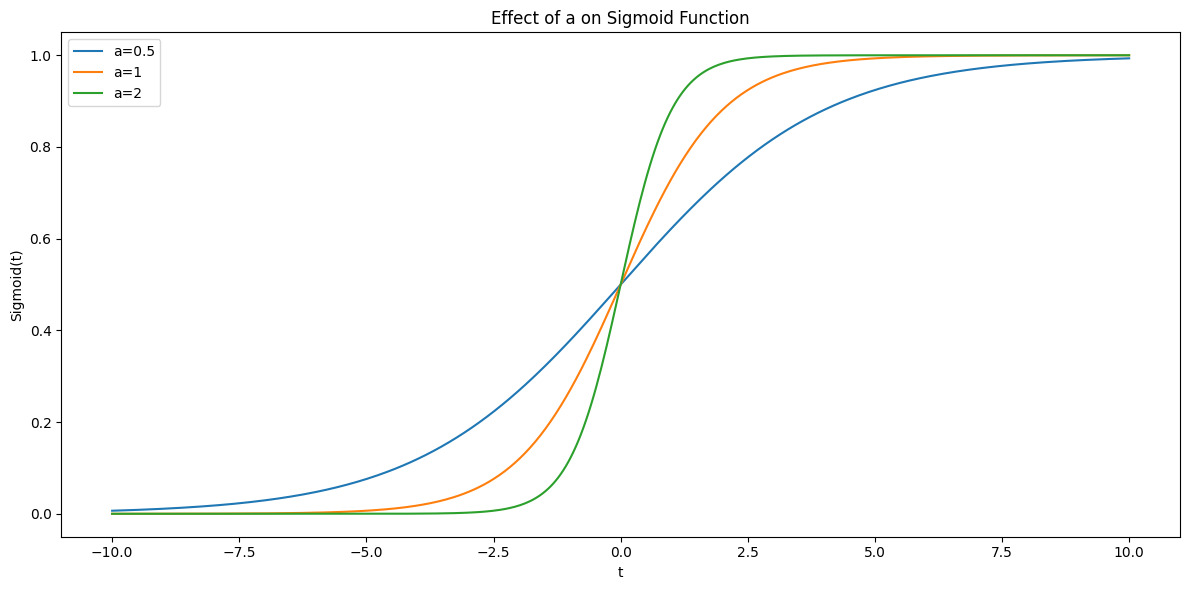

In [89]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(-10, 10, 400)

# Different values for 'a'
a_values = [0.5, 1, 2]

fig, ax = plt.subplots(figsize=(12, 6))

for a in a_values:
    sigmoid = 1 / (1 + np.exp(-a * t))
    ax.plot(t, sigmoid, label=f'a={a}')

ax.set_title('Effect of a on Sigmoid Function')
ax.set_ylabel('Sigmoid(t)')
ax.set_xlabel('t')
ax.legend()
plt.tight_layout()
plt.show()
